In [1]:
!pip install pandas

In [15]:
!pip install scikit-learn

  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [135]:
import pandas as pd

In [136]:
df = pd.read_csv("data/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [137]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [138]:
features = ['enginesize', 'fueltype', 'stroke', 'horsepower']
X = df[features]
X.head()

,enginesize,fueltype,stroke,horsepower
0,130,gas,2.68,111
1,130,gas,2.68,111
2,152,gas,3.47,154
3,109,gas,3.40,102
4,136,gas,3.40,115


In [139]:
Y = df[['price']]

### Scaling

In [140]:
pd.options.mode.chained_assignment = None  # default='warn'

In [141]:
import sklearn.preprocessing as preprocessing
X[['enginesize', 'stroke', 'horsepower']] = preprocessing.scale(X[['enginesize', 'stroke', 'horsepower']])
X.head()

,enginesize,fueltype,stroke,horsepower
0,0.074449,gas,-1.839377,0.174483
1,0.074449,gas,-1.839377,0.174483
2,0.604046,gas,0.685946,1.264536
3,-0.431076,gas,0.462183,-0.053668
4,0.218885,gas,0.462183,0.275883


In [142]:
X = pd.get_dummies(X)
X.head()

,enginesize,stroke,horsepower,fueltype_diesel,fueltype_gas
0,0.074449,-1.839377,0.174483,0,1
1,0.074449,-1.839377,0.174483,0,1
2,0.604046,0.685946,1.264536,0,1
3,-0.431076,0.462183,-0.053668,0,1
4,0.218885,0.462183,0.275883,0,1


In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Importing torch libraries

In [145]:
import torch
import torch.nn.functional as F
import torch.optim as optim

### Hyperparameters

In [146]:
input_size = X_train_tensor.shape[1]
hidden_size = 100
output_size = 1

loss_fn = torch.nn.MSELoss()
learning_rate = 1e-4

### Network architecture

In [194]:
class RegNet(torch.nn.Module):
    def  __init__(self, input_size, hidden_size, output_size, activation_fn = 'sigmoid', apply_dropout = False):
        super(RegNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.fc3 = torch.nn.Linear(hidden_size, output_size)
        
        self.hidden_size = hidden_size
        self.activation_fn = activation_fn
        
        self.dropout = None
        if apply_dropout:
            self.dropout = torch.nn.Dropout(0.2)
            
    def forward(self, x):
        activation_fn = None
        if self.activation_fn == 'sigmoid':
            activation_fn = F.torch.sigmoid
        elif self.activation_fn == 'relu':
            activation_fn = F.relu
        
        x = activation_fn(self.fc1(x))
        
        if self.dropout != None:
            x = self.dropout(x)
        
        x = self.fc3(x)
        
        return x

In [195]:
def train_model(model, X_train, Y_train, nb_epochs, learning_rate = 1e-4):
    optimizer = optim.SGD(model.parameters(), lr = learning_rate)
    
    loss_fn = torch.nn.MSELoss()
    
    for epoch in range(1, nb_epochs+1):
        
        optimizer.zero_grad()
        
        Y_pred = model(X_train)
        
        loss = loss_fn(Y_pred, Y_train)
        loss.backward()
        optimizer.step()
        
        if epoch % 1000 == 0:
            print(epoch, loss.item())
        
    return model

### Creating the tensors

In [196]:
X_train_tensor = torch.Tensor(X_train.values)
Y_train_tensor = torch.Tensor(Y_train.values)
X_test_tensor = torch.Tensor(X_test.values)
Y_test_tensor = torch.Tensor(Y_test.values)

In [197]:
nb_epochs = 10000

### Create Model object & Train

In [198]:
net = RegNet(input_size, hidden_size, output_size, 'sigmoid', False)

In [199]:
model = train_model(net, X_train_tensor, Y_train_tensor, nb_epochs, learning_rate)

1000 16912758.0
2000 13610262.0
3000 11884059.0
4000 10618943.0
5000 9670254.0
6000 8875057.0
7000 8210735.5
8000 7649811.5
9000 7171187.5
10000 6761308.0


In [200]:
Y_pred = model(X_test_tensor).detach().numpy()

In [201]:
import matplotlib.pyplot as plt

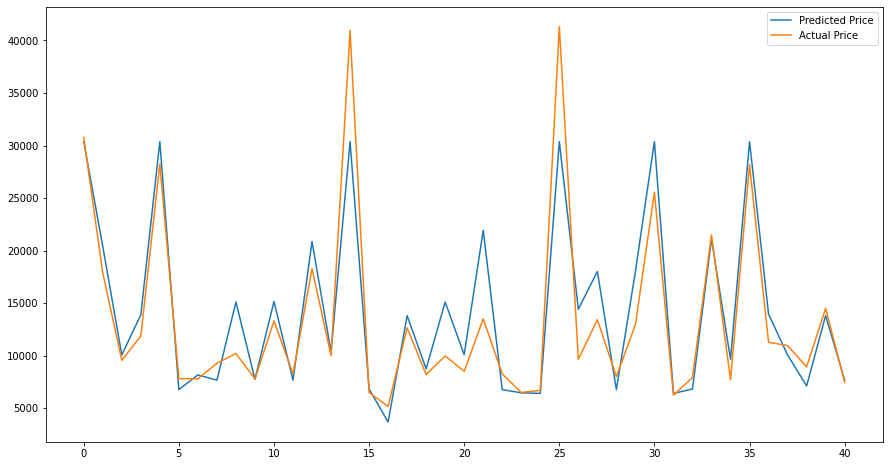

In [202]:
plt.figure(figsize=(15,8))

plt.plot(Y_pred, label="Predicted Price")
plt.plot(Y_test.values, label="Actual Price")

plt.legend()
plt.show()

### Getting the r2 score

In [203]:
import sklearn
sklearn.metrics.r2_score(Y_pred, Y_test)

0.814290164321582